# Muhammad Putra Harifin Pane

In [1]:

# impor semua library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn import preprocessing


In [2]:
# Panggil Dataset kedalam program
from google.colab import files
uploaded = files.upload()

Saving DATA-RUMAH.csv to DATA-RUMAH.csv


In [4]:
# load dataset
df = pd.read_csv('DATA-RUMAH.csv')
df.head(10)

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
5,6,Rumah Mewah Modern Murah 3 lantai di Tebet Jak...,4970000000,300,154,5,3,3
6,7,"Rumah lama di Tebet, dekat MT Haryono dan tol ...",2600000000,120,150,3,2,1
7,8,RUMAH BAGUS KEREN JALAN LEBAR DI AREA & KAWASA...,10500000000,350,247,4,4,0
8,9,Minimalis Baru Jalan 1 Mobil Akses Mudah Dekat...,3250000000,125,90,3,3,0
9,10,"Minimalis Baru Jalan 2 Mobil Tebet Timur, Tebe...",4500000000,250,96,5,4,1


In [5]:
# total data
df.shape

(1010, 8)

In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


In [7]:
# null check
df.isnull().sum()

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


In [9]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [11]:
df = df.drop(['NO', 'NAMA RUMAH', 'HARGA', 'KT','KM','GRS'], axis=1)
df

,LB,LT
0,220,220
1,180,137
2,267,250
3,40,25
4,400,355
...,...,...
1005,450,550
1006,160,140
1007,139,230
1008,360,606


In [12]:
# Melakukan pelabelan data
data_train = df.values
X = data_train[:,0:1] #Atribut
Y = data_train[:,1:2] #Label
data_train

array([[220, 220],
       [180, 137],
       [267, 250],
       ...,
       [139, 230],
       [360, 606],
       [420, 430]])

In [13]:
# Mengubah dataset menjadi format yang dapat diterima model
def windowed_dataset(series, shuffle_buffer, window_size, batch_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [14]:
# Normalisasi data
min_max_scaler = preprocessing.MinMaxScaler()
Y_scale = min_max_scaler.fit_transform(Y)

In [15]:
# Melakukan splitting data
train_date, test_date, train_price, test_price = train_test_split(X, Y_scale, test_size=0.2)

train_set = windowed_dataset(train_price, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(test_price, window_size=60, batch_size=100, shuffle_buffer=1000)

In [16]:
# Membuat model
from keras.layers import Dense, LSTM, Dropout
model = Sequential([
  LSTM(60, input_shape=(360,1)),
  Dropout(0.2),
  Dense(100, activation="relu"),
  Dense(30, activation="relu"),
  Dense(1),
])

In [17]:
# Membuat fitur callback
minMAE = 0.1
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('mae')< minMAE):
      print('\nNilai minimum MAE telah tercapai, proses dihentikan!')
      self.model.stop_training = True

callbacks = myCallback()

In [18]:
# Menambahkan optimizer
optimizer = SGD(learning_rate=1.0000e-03, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [19]:
# Melakukan training data
history = model.fit(train_set, epochs=100, validation_data=val_set, callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - 4s 191ms/step - loss: 0.0238 - mae: 0.1694 - val_loss: 0.0140 - val_mae: 0.1280
Epoch 2/100
8/8 [==============================] - 1s 94ms/step - loss: 0.0195 - mae: 0.1426 - val_loss: 0.0103 - val_mae: 0.0929
Epoch 3/100
8/8 [==============================] - 1s 51ms/step - loss: 0.0155 - mae: 0.1122 - val_loss: 0.0083 - val_mae: 0.0775
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 0.0130 - mae: 0.0947
Nilai minimum MAE telah tercapai, proses dihentikan!
8/8 [==============================] - 1s 53ms/step - loss: 0.0130 - mae: 0.0947 - val_loss: 0.0072 - val_mae: 0.0720


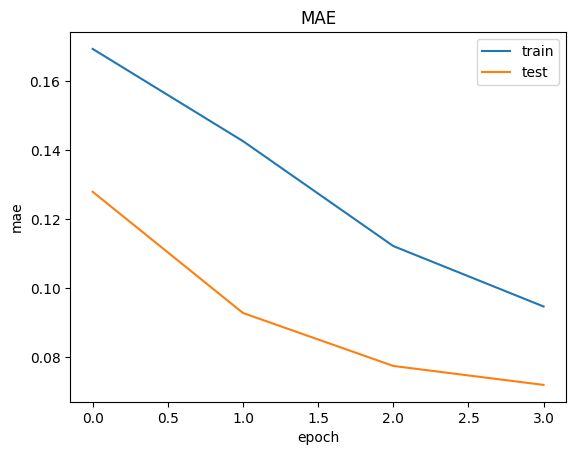

In [20]:
# Menampilkan plotting MAE
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

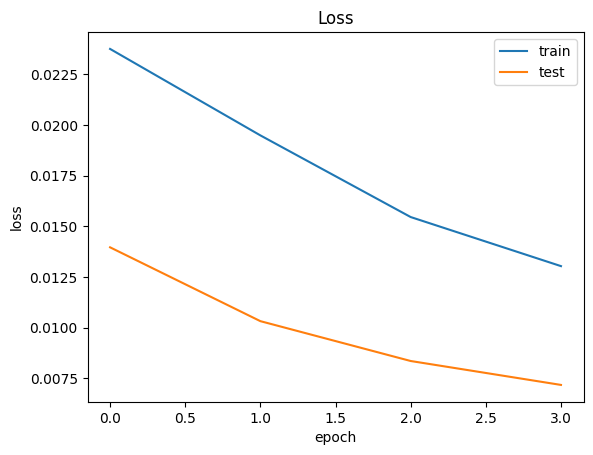

In [21]:
# Menampilkan plotting Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()